In [1]:
import numpy as np
import matplotlib.pyplot as plt

size=100
total_x = np.linspace(0, size, size)
np.random.shuffle(total_x)
init_w = np.random.randint(5, size=1)
init_b = np.random.normal(2, 30, (size, ))
total_y = total_x * init_w + init_b

print("init_w={0}, init_b={1}".format(init_w, init_b.sum()/len(init_b)))
print("first 20 elements of \nx: {0} \r\ny: {1}".format(total_x[:20], total_y[:20]))
batch_size=30
train_x = total_x[:batch_size]
train_y = total_y[:batch_size]

loop=5
w=0
b=0
rate=0.0001
N = len(train_y)

init_w=[4], init_b=2.2044195861047204
first 20 elements of 
x: [ 38.38383838  47.47474747  37.37373737  65.65656566  97.97979798
   2.02020202  64.64646465  34.34343434  87.87878788  51.51515152
  67.67676768  33.33333333  16.16161616   7.07070707   3.03030303
  14.14141414  11.11111111   6.06060606  26.26262626  43.43434343] 
y: [ 195.00220011  147.82886338  165.16775305  229.34653705  397.50360781
   19.58609919  244.31557259  148.99859173  329.58110954  169.88333956
  251.30160731  118.89461048   98.58564543   35.49313993   34.52962872
   46.62391746   48.30819868   27.27436551   77.25420912  182.45684668]


w:3.830845808503313, b:0.06392876072850506, loss:577


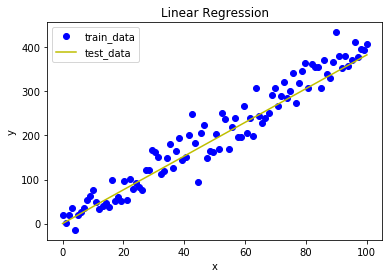

In [ ]:
loss = 0
for i in range(loop):
    pred_y = w * train_x + b
    loss = ((train_y - pred_y) ** 2 / N).sum().astype(int)
    gradient_w = ((pred_y - train_y) * train_x * 2 / N).sum()#f'(w)=2/N*x*(wx+b-y)
    gradient_b = ((pred_y - train_y) * 2 / N).sum()#f'(b)=2/N*(wx+b-y)
#     print("loss={0}, w={1}, gradient_w={2}, b={3}, gradient_b={4}".format(loss, w, gradient_w, b, gradient_b))
    w = w - (rate * gradient_w)
    b = b - (rate * gradient_b)
print("w:{0}, b:{1}, loss:{2}".format(w, b, loss))

test_y = w * train_x + b

min_x = min(total_x[batch_size:])
max_x = max(total_x[batch_size:])
result_x = np.array([min_x, max_x])
result_y = np.array([w * min_x + b, w * max_x + b])
    
plt.plot(total_x, total_y, 'bo', label='train_data')
plt.plot(result_x, result_y, 'y', label='test_data')

plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

In [ ]:
import keras
from keras import models
from keras import layers
from keras import optimizers

network = models.Sequential()
network.add(layers.Dense(1, activation='linear', input_shape=(1,)))

opt = optimizers.SGD(lr=rate)
network.compile(optimizer=opt,
                loss='mse',
                metrics=['accuracy'])
network.fit(train_x, train_y, epochs=loop, batch_size=10)
W,b = network.layers[0].get_weights()
print("w:{0}, b:{1}".format(W, b))


Using TensorFlow backend.


In [ ]:
x_test = total_x[batch_size:]

y_pred = network.predict(x_test)
plt.scatter(x_test, y_pred)
# plt.plot(x_test, y_pred)
plt.show()